# 📊 Air Quality Prediction Starter Notebook 🌱 - By Hackade

![Hackade.png](attachment:Hackade.png)

Welcome to the **Air Quality Prediction Competition**! This starter notebook is designed to help you kick off your journey with ease. Here's what you'll find:

- **Data Exploration**: Understand the train and test datasets 📈.
- **Feature Engineering**: Identify and select relevant features 🔍.
- **Baseline Modeling**: Train a Random Forest model to predict CO2 levels 🌳.
- **Submission**: Generate predictions and create a submission file 📤.

Feel free to build on this foundation, explore new models, and unleash your creativity. Good luck! 🚀


## 📦 Importing Libraries 🛠️

In this section, we import the essential libraries needed for data analysis, visualization, and modeling:

- **`pandas`**: For data manipulation and analysis 🐼.
- **`numpy`**: For numerical computations 🔢.
- **`matplotlib.pyplot`**: To create static, interactive, and publication-quality visualizations 📊.
- **`seaborn`**: For beautiful and informative statistical graphics 🎨.
- **`sklearn.model_selection`**: To split the data into training and validation sets 🎯.
- **`sklearn.ensemble.RandomForestRegressor`**: A robust machine learning algorithm for regression tasks 🌳.
- **`sklearn.metrics.mean_squared_error`**: To evaluate the performance of our model using RMSE 📏.

These libraries form the backbone of our analysis and modeling pipeline. Let's get started! 🚀


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## 📂 Loading the Data 📥

Here, we load the competition datasets into our notebook:

- **`train_data`**: Contains the training dataset, including features and the target variable (CO2 levels) 📝.
- **`test_data`**: Includes the test dataset for which we need to make predictions 🔍.
- **`sample_submission`**: Provides the required format for submitting predictions 📤.

By loading these datasets, we set the foundation for our analysis and modeling process. Time to dive in! 🌊


In [ ]:
# Load data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission = pd.read_csv("SampleSubmission.csv")


## 🔍 Quick Peek at Training Data 🧐

We take an initial look at the **training dataset** to understand its structure and contents:

- **`train_data.head()`**: Displays the first few rows of the dataset 📝.


In [ ]:
print("Train Data Overview:\n")
train_data.head()

Train Data Overview:



,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,CO2
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,alpha,585.75
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,alpha,613.00
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,alpha,616.50
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,alpha,642.50
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,alpha,622.00


In [ ]:
print("Test Data Overview:\n")
test_data.head()

Test Data Overview:



,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name
0,ID_007308,32.450,59.990,3504.0,1380.0,2642.5,1637.0,alpha
1,ID_007309,31.665,58.640,2864.0,1659.0,4456.0,3564.5,alpha
2,ID_007310,31.755,59.000,2850.5,1615.0,4391.0,2683.5,alpha
3,ID_007311,31.860,66.850,3853.5,2868.5,4170.5,3025.5,alpha
4,ID_007312,29.600,73.115,2506.5,3631.5,1481.5,2112.5,alpha


## 🕵️ Exploratory Data Analysis (EDA) 🔍

We begin EDA with a structural overview of the training dataset:

- **`train_data.info()`**: Provides information about the dataset, including:
  - Number of entries and columns 📊.
  - Data types of each column 🔢.
  - Non-null counts to identify missing values ⚠️.

This step helps us assess the data's quality and prepare for further analysis. Let’s uncover the story behind the data! 📖


In [ ]:
# Exploratory Data Analysis
print("Train Data Info:\n")
train_data.info()

Train Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            7307 non-null   object 
 1   Temperature   7307 non-null   float64
 2   Humidity      7307 non-null   float64
 3   MQ7_analog    7307 non-null   float64
 4   MQ9_analog    7307 non-null   float64
 5   MG811_analog  7307 non-null   float64
 6   MQ135_analog  7307 non-null   float64
 7   device_name   7307 non-null   object 
 8   CO2           7307 non-null   float64
dtypes: float64(7), object(2)
memory usage: 513.9+ KB


## 📈 Target Variable Distribution 🧐

Let's visualize the distribution of the target variable, **CO2**, to understand its behavior:

- **`sns.histplot()`**: Creates a histogram of the `CO2` values with a KDE (Kernel Density Estimate) overlay for smoother insights 📊.
- **Customization**:
  - Adjusts figure size for better clarity 🖼️.
  - Adds labels and a title to make the plot informative ✍️.

This plot reveals key insights about the variability and skewness of CO2 levels, guiding our modeling decisions. 🎯


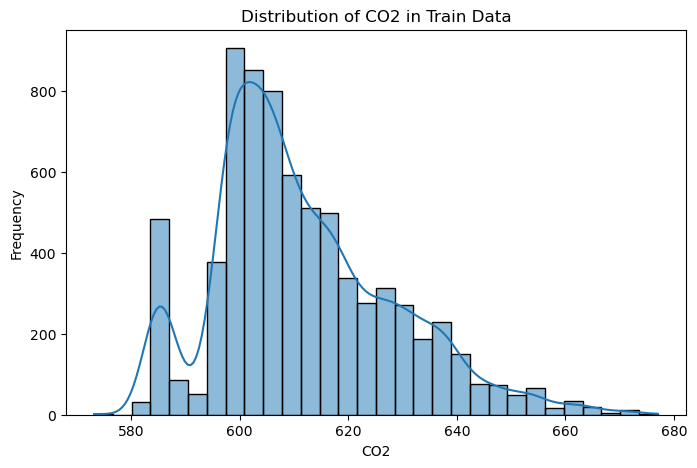

In [ ]:
# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.histplot(train_data['CO2'], kde=True, bins=30)
plt.title('Distribution of CO2 in Train Data')
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.show()


## 🔗 Correlation Analysis 🔍

Here, we examine the relationships between numerical features in the dataset:

- **`train_data.corr()`**: Computes pairwise correlations between features 📊.
- **`sns.heatmap()`**: Visualizes the correlations in a heatmap for easy interpretation 🎨.
  - **`annot=False`**: Keeps the heatmap uncluttered by excluding correlation values 🧹.
  - **`cmap='coolwarm'`**: Uses a visually appealing color scheme 🌈.
- **Customization**: Adjusts figure size and adds a title for clarity ✍️.

This step helps us identify highly correlated features, which can influence feature selection and model performance. 🚀


C:\Users\osink\AppData\Local\Temp\ipykernel_54576\1000836810.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=False, cmap='coolwarm')


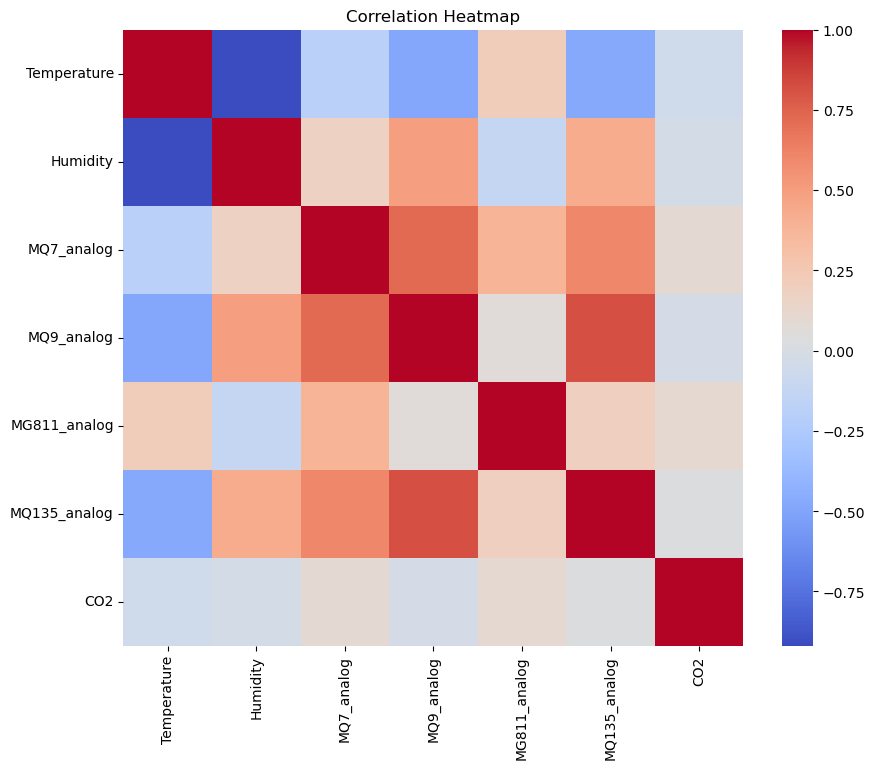

In [ ]:
# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## ✂️ Feature Selection & Preprocessing 🔄

We define the key components for model training:

- **`features`**: A list of selected columns used as input predictors for the model 📊.
  - Includes environmental and sensor data like `Temperature`, `Humidity`, and sensor readings.
- **`target`**: The column we aim to predict (`CO2`) 🎯.

This step ensures we focus on the most relevant variables for building an effective predictive model. 🚀


In [ ]:
# Feature selection and preprocessing
features = ['Temperature', 'Humidity', 'MQ7_analog', 'MQ9_analog', 'MG811_analog', 'MQ135_analog']
target = 'CO2'

## 🎯 Splitting Features and Target 📋

We separate the dataset into:

- **`X`**: The input features defined earlier (predictors) 🔢.
- **`y`**: The target variable, **CO2**, which we aim to predict 🌟.

This separation is crucial for training machine learning models, ensuring a clear distinction between inputs and outputs. 🚀


In [ ]:
X = train_data[features]
y = train_data[target]

## ✂️ Train-Test Split 🔀

We divide the data into training and validation sets:

- **`train_test_split()`**: Splits the data into:
  - **`X_train`** & **`y_train`**: For training the model 🏋️.
  - **`X_val`** & **`y_val`**: For evaluating the model's performance 📏.
- **Parameters**:
  - **`test_size=0.2`**: Reserves 20% of the data for validation 🧪.
  - **`random_state=42`**: Ensures reproducibility with a fixed random seed 🔒.

This step ensures the model is trained on one set of data and tested on another, reducing the risk of overfitting. 🚀


In [ ]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 🌳 Model Training: Random Forest Regressor 🚀

We train a **Random Forest Regressor** to predict CO2 levels:

- **`RandomForestRegressor`**: A powerful ensemble-based model that combines multiple decision trees 🌟.
- **Parameters**:
  - **`random_state=42`**: Ensures reproducibility by setting a fixed random seed 🔒.
  - **`n_estimators=100`**: Uses 100 trees in the forest for robust predictions 🌲.

- **`fit(X_train, y_train)`**: Trains the model on the training dataset 🏋️.

This model is well-suited for handling complex patterns in data while reducing overfitting risks. 🌟


In [ ]:
# Model training: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## 🧪 Model Validation 📏

We evaluate the trained model's performance on the validation set:

- **`rf_model.predict(X_val)`**: Generates predictions for the validation data 🔮.
- **`mean_squared_error(y_val, val_predictions)`**: Computes the Mean Squared Error (MSE) between actual and predicted values 🧮.
- **`np.sqrt()`**: Calculates the Root Mean Squared Error (RMSE) for easier interpretation 🔢.

- **Output**:
  - The **Validation RMSE** indicates how well the model predicts CO2 levels on unseen data. Lower values are better! 📉

This step helps assess model accuracy and identify areas for improvement. 🚀


In [ ]:
# Validation
val_predictions = rf_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f"Validation RMSE: {val_rmse:.2f}")

Validation RMSE: 5.02


## 🔮 Generating Test Predictions 📤

We use the trained model to predict CO2 levels for the test dataset:

- **`test_features`**: Extracts the same selected features from the test data 📊.
- **`rf_model.predict(test_features)`**: Applies the Random Forest model to generate predictions 🔮.

These predictions are the core output for submission to the competition hosted on **Zindi** 🏆. Time to submit and climb the leaderboard! 🚀


In [ ]:
# Test predictions
test_features = test_data[features]
test_predictions = rf_model.predict(test_features)

## 📤 Preparing the Submission File 📝

We format our predictions for submission to the **Zindi** competition:

- **`sample_submission['CO2']`**: Updates the `CO2` column with the predicted values from the test dataset 🌟.
- **`to_csv('submission.csv', index=False)`**: Saves the updated dataframe as a CSV file named `submission.csv` 📁.

- **Output**:
  - Prints a confirmation message: *"Submission file saved as 'submission.csv'"* ✅.

With the submission file ready, you're all set to compete and aim for the top spot on Zindi! 🏆🚀


In [ ]:
# Prepare submission
sample_submission['CO2'] = test_predictions
sample_submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'


## 🎉 Wrapping Up 🌟

Congratulations on completing the **Air Quality Prediction Notebook**! Here's a quick recap of what we've achieved:

- 📊 **Explored the Data**: Gained insights into the training and test datasets.
- 🌲 **Trained a Model**: Built a Random Forest Regressor to predict CO2 levels.
- 📏 **Validated the Model**: Assessed its performance using RMSE on validation data.
- 📤 **Prepared Submission**: Generated predictions and created a submission file for the Zindi competition.

This notebook and its explanations were thoughtfully generated by **ChatGPT**, designed to help you kickstart your journey in this competition with ease. 🚀

Good luck on the **Zindi leaderboard**, and remember: every improvement counts! 🏆💪


### Hosts: Olufemi Victor Tolulope & Olaleye Eniola


Victor's Socials:

- [Twitter](https://twitter.com/olufemivictort)
- [LinkedIn](https://www.linkedin.com/in/olufemi-victor-tolulope)
- [website](https://www.olufemivictor.com/)

Eniola's Socials
- [Twitter](https://x.com/galileoeni)
- [LinkedIn](https://www.linkedin.com/in/eniola-olaleye-361b39160)
- [website](https://galileoeni.github.io/galileo/)